In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.style.use('fivethirtyeight')
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

c:\Users\ved14\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('data\household_power_consumption.csv')
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [3]:
temp=df.iloc[:3000,:]
temp

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2995,2995,3/1/07,1:55:00,0.32,0.15,243.67,1.4,0,0,0.0
2996,2996,3/1/07,1:56:00,0.322,0.15,243.8,1.4,0,0,0.0
2997,2997,3/1/07,1:57:00,0.324,0.156,244.77,1.4,0,0,0.0
2998,2998,3/1/07,1:58:00,0.326,0.16,245.45,1.4,0,0,0.0


In [4]:
temp=temp.fillna(method='bfill')
#temp=temp.drop('time',axis=1)
temp=temp.iloc[:,3:6]
temp

,Global_active_power,Global_reactive_power,Voltage
0,2.58,0.136,241.97
1,2.552,0.1,241.75
2,2.55,0.1,241.64
3,2.55,0.1,241.71
4,2.554,0.1,241.98
...,...,...,...
2995,0.32,0.15,243.67
2996,0.322,0.15,243.8
2997,0.324,0.156,244.77
2998,0.326,0.16,245.45


In [5]:
num_features=len(temp.columns)
num_features

3

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
temp=scaler.fit_transform(temp)

In [7]:
temp

array([[0.68197474, 0.15777262, 0.50062035],
       [0.673938  , 0.11600928, 0.4869727 ],
       [0.67336395, 0.11600928, 0.48014888],
       ...,
       [0.03444317, 0.18097448, 0.67431762],
       [0.03501722, 0.18561485, 0.71650124],
       [0.03501722, 0.18561485, 0.70657568]])

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [9]:
dataset=np.asarray(temp)

In [10]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator 
seq_size = length =  21
batch_size = 7
train_generator = TimeseriesGenerator(train,
                                      train,
                                      length=length,
                                      batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train))
print("Total number of samples in the generated data = ", len(train_generator))

Total number of samples in the original training data =  2250
Total number of samples in the generated data =  319


In [12]:
validation_generator = TimeseriesGenerator(test, 
                                           test, 
                                           length=length ,
                                           batch_size=batch_size)

In [13]:
validation_generator[0]

(array([[[0.07347876, 0.14385151, 0.5117866 ],
         [0.06946039, 0.14849188, 0.53473945],
         [0.06888634, 0.14385151, 0.49379653],
         [0.06946039, 0.14849188, 0.51985112],
         [0.06888634, 0.14617169, 0.51674938],
         [0.06773823, 0.14153132, 0.45099256],
         [0.06659013, 0.13457077, 0.38337469],
         [0.06601607, 0.13457077, 0.39019851],
         [0.05683123, 0.0812065 , 0.40756824],
         [0.04764638, 0.        , 0.52295285],
         [0.04822044, 0.        , 0.55086849],
         [0.04879449, 0.        , 0.58746898],
         [0.04822044, 0.        , 0.58002481],
         [0.04879449, 0.        , 0.61290323],
         [0.04936854, 0.        , 0.6426799 ],
         [0.04764638, 0.        , 0.53039702],
         [0.04764638, 0.        , 0.5235732 ],
         [0.06888634, 0.11136891, 0.50620347],
         [0.07864524, 0.17633411, 0.46960298],
         [0.07749713, 0.17633411, 0.46153846],
         [0.07807118, 0.18329466, 0.52853598]],
 
        [[

In [14]:
model = Sequential()
model.add(LSTM(50, 
               activation='relu', 
               return_sequences=True, 
               input_shape=(length, num_features),
               recurrent_dropout=0.4))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32))
model.add(Dense(num_features))
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=tf.keras.metrics.MeanAbsoluteError(),
              )

model.summary()
print('Train...')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 21, 50)            10800     
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 106,675
Trainable params: 106,675
Non-trainable params: 0
_________________________________________________________________
Train...


In [15]:
monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                         min_delta=1e-3, 
                         patience=40, 
                        verbose=1, 
                        mode='auto', 
                        restore_best_weights=True)
history=model.fit_generator(generator=train_generator, 
                    verbose=2, 
                    epochs=150, 
                    validation_data=validation_generator,
                    callbacks=monitor)

Epoch 1/150


C:\Users\ved14\AppData\Local\Temp/ipykernel_12916/511386979.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


319/319 - 21s - loss: 0.0134 - mean_absolute_error: 0.0818 - val_loss: 0.0167 - val_mean_absolute_error: 0.0905 - 21s/epoch - 66ms/step
Epoch 2/150
319/319 - 14s - loss: 0.0067 - mean_absolute_error: 0.0617 - val_loss: 0.0135 - val_mean_absolute_error: 0.0795 - 14s/epoch - 44ms/step
Epoch 3/150
319/319 - 14s - loss: 0.0051 - mean_absolute_error: 0.0515 - val_loss: 0.0106 - val_mean_absolute_error: 0.0745 - 14s/epoch - 45ms/step
Epoch 4/150
319/319 - 14s - loss: 0.0044 - mean_absolute_error: 0.0475 - val_loss: 0.0079 - val_mean_absolute_error: 0.0585 - 14s/epoch - 45ms/step
Epoch 5/150
319/319 - 14s - loss: 0.0036 - mean_absolute_error: 0.0424 - val_loss: 0.0064 - val_mean_absolute_error: 0.0536 - 14s/epoch - 44ms/step
Epoch 6/150
319/319 - 14s - loss: 0.0033 - mean_absolute_error: 0.0403 - val_loss: 0.0076 - val_mean_absolute_error: 0.0607 - 14s/epoch - 44ms/step
Epoch 7/150
319/319 - 14s - loss: 0.0031 - mean_absolute_error: 0.0386 - val_loss: 0.0057 - val_mean_absolute_error: 0.0504 

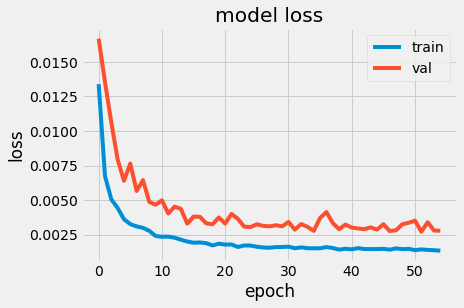

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

<AxesSubplot:>

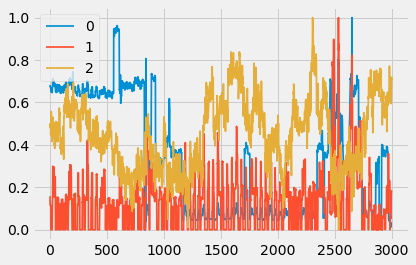

In [17]:
pd.DataFrame(temp).plot(linewidth=1.7)

In [18]:
predictions=model.predict(
    validation_generator
)

105/105 [==============================] - 2s 11ms/step


In [19]:
predictions=scaler.inverse_transform(predictions)
test=scaler.inverse_transform(test)

In [20]:
predictions

array([[4.9302191e-01, 1.7961970e-01, 2.4213403e+02],
       [4.8328674e-01, 1.7892511e-01, 2.4240198e+02],
       [4.7430083e-01, 1.8321504e-01, 2.4306021e+02],
       ...,
       [4.1349259e-01, 1.5677063e-01, 2.4401205e+02],
       [4.0751085e-01, 1.6625999e-01, 2.4439946e+02],
       [3.9987928e-01, 1.7015240e-01, 2.4489320e+02]], dtype=float32)

In [21]:
test

array([[4.6000e-01, 1.2400e-01, 2.4215e+02],
       [4.4600e-01, 1.2800e-01, 2.4252e+02],
       [4.4400e-01, 1.2400e-01, 2.4186e+02],
       ...,
       [3.2400e-01, 1.5600e-01, 2.4477e+02],
       [3.2600e-01, 1.6000e-01, 2.4545e+02],
       [3.2600e-01, 1.6000e-01, 2.4529e+02]])

In [22]:
temp=pd.DataFrame(temp)

Text(0.5, 1.0, 'Voltage')

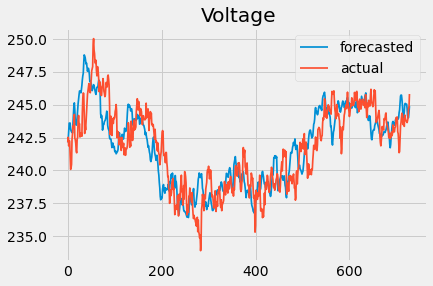

In [23]:
temp_df=pd.concat([pd.DataFrame(predictions[:,2]),pd.DataFrame(test[:len(predictions),2])],axis=1)
temp_df.plot(linewidth=1.7)
plt.legend(['forecasted','actual'])
plt.title('Voltage')

Text(0.5, 1.0, 'Globall Reactive Power')

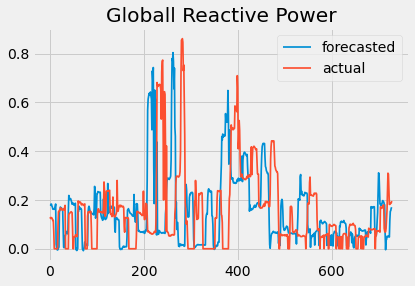

In [24]:
temp_df=pd.concat([pd.DataFrame(predictions[:,1]),pd.DataFrame(test[:len(predictions),1])],axis=1)
temp_df.plot(linewidth=1.7)
plt.legend(['forecasted','actual'])
plt.title('Globall Reactive Power')

Text(0.5, 1.0, 'Voltage')

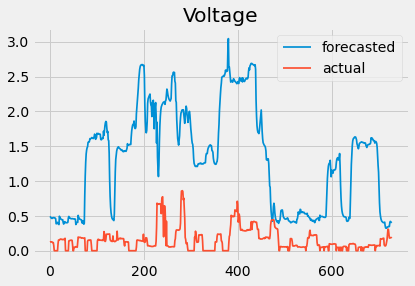

In [25]:
temp_df=pd.concat([pd.DataFrame(predictions[:,0]),pd.DataFrame(test[:len(predictions),1])],axis=1)
temp_df.plot(linewidth=1.7)
plt.legend(['forecasted','actual'])
plt.title('Voltage')

In [26]:
mat=np.array(temp_df)

<AxesSubplot:ylabel='Density'>

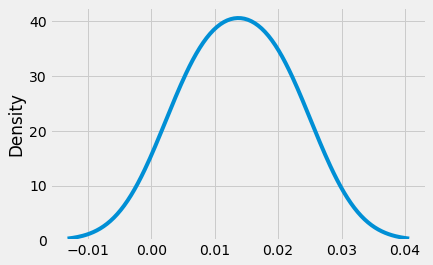

In [27]:
sns.kdeplot(2*(np.abs(mat[:][0]-mat[:][1])))